# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd

# Lê o arquivo
previsao_de_renda = pd.read_csv("previsao_de_renda.csv")

# Confere rapidamente as colunas relevantes
previsao_de_renda[["posse_de_imovel", "posse_de_veiculo", "renda"]].head()

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,False,True,7246.69
4,False,False,4017.37


In [7]:
#Verifica o formato da data no Dataframe
previsao_de_renda["data_ref"].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: data_ref, dtype: datetime64[ns]

In [6]:
# Verifica os tipos de dados de cada coluna
previsao_de_renda.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
ano_mes                       period[M]
dtype: object

In [12]:
variaveis_quantitativas = ["qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "renda"]

In [13]:
# Agrupar por mês e calcular a média das variáveis quantitativas
media_mensal = previsao_de_renda.groupby("ano_mes")[variaveis_quantitativas].mean()
media_mensal.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
ano_mes,,,,,
2015-01,0.431,43.794,7.677761,2.201,4606.01071
2015-02,0.438,44.109,7.688772,2.217,4672.76708
2015-03,0.408,43.657,7.826948,2.173,4616.11109
2015-04,0.428,43.534,7.750912,2.198,4578.24089
2015-05,0.394,43.935,8.087878,2.174,4631.34791


In [18]:
import matplotlib.pyplot as plt

# Seleciona variáveis qualitativas do dataframe
variaveis_qualitativas = [
    "sexo", "posse_de_veiculo", "posse_de_imovel",
    "tipo_renda", "educacao", "estado_civil", "tipo_residencia"
]

# Filtra apenas as variáveis bivariadas (com 2 categorias)
variaveis_bivariadas = [
    col for col in variaveis_qualitativas if previsao_de_renda[col].nunique() == 2
]

print("Variáveis bivariadas identificadas:", variaveis_bivariadas)

Variáveis bivariadas identificadas: ['sexo', 'posse_de_veiculo', 'posse_de_imovel']


<Figure size 1000x500 with 0 Axes>

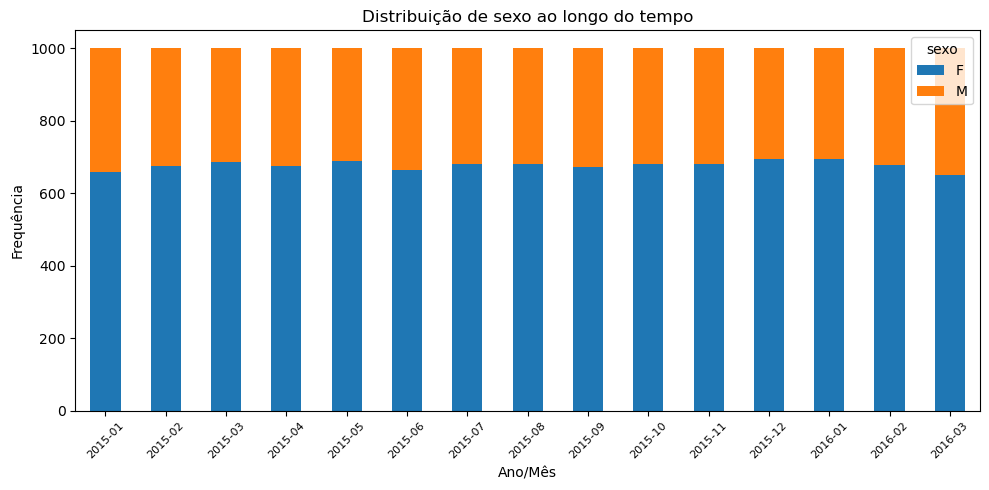

<Figure size 1000x500 with 0 Axes>

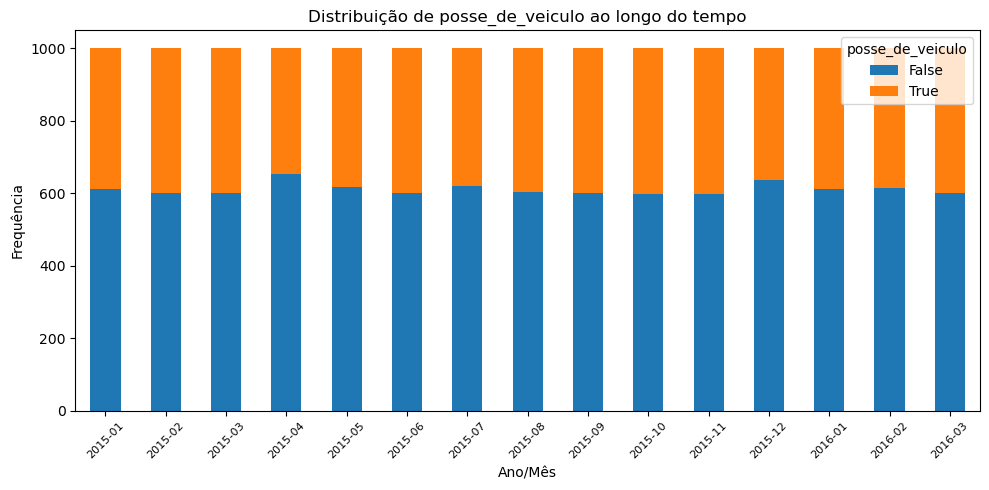

<Figure size 1000x500 with 0 Axes>

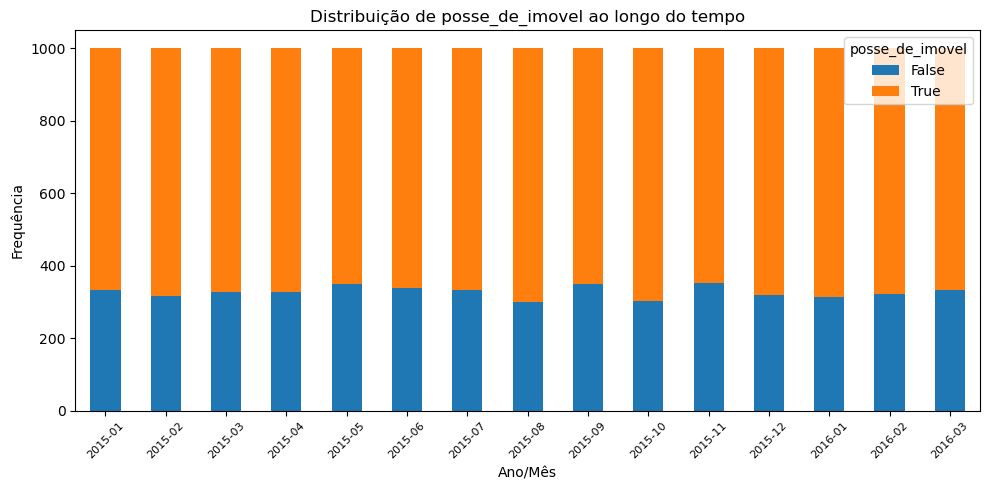

In [19]:
for col in variaveis_bivariadas:
    plt.figure(figsize=(10,5))
    
    # Conta a frequência de cada categoria por mês
    distrib = previsao_de_renda.groupby(["ano_mes", col]).size().unstack(fill_value=0)
    
    # Gráfico de barras empilhadas
    distrib.plot(kind="bar", stacked=True, figsize=(10,5))
    plt.title(f"Distribuição de {col} ao longo do tempo")
    plt.xlabel("Ano/Mês")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title=col, loc="best")
    plt.tight_layout()
    plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<Figure size 1000x500 with 0 Axes>

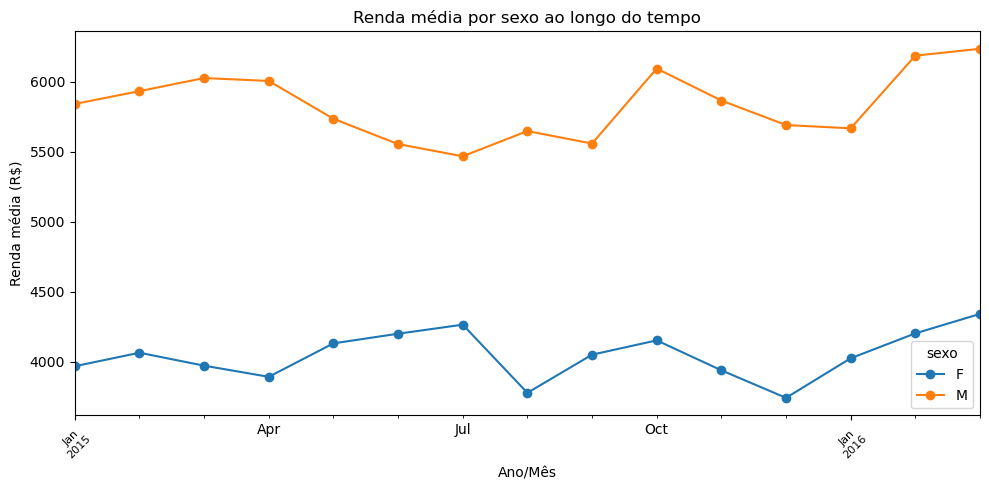

<Figure size 1000x500 with 0 Axes>

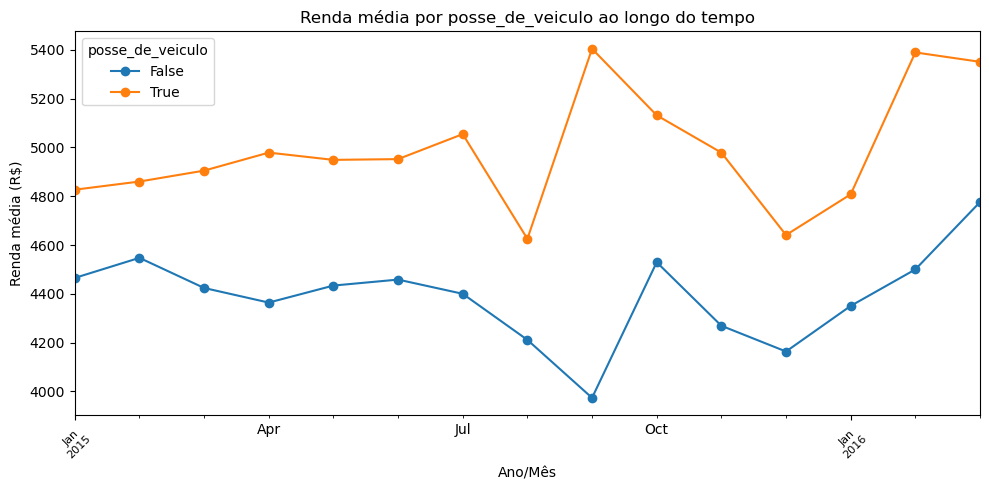

<Figure size 1000x500 with 0 Axes>

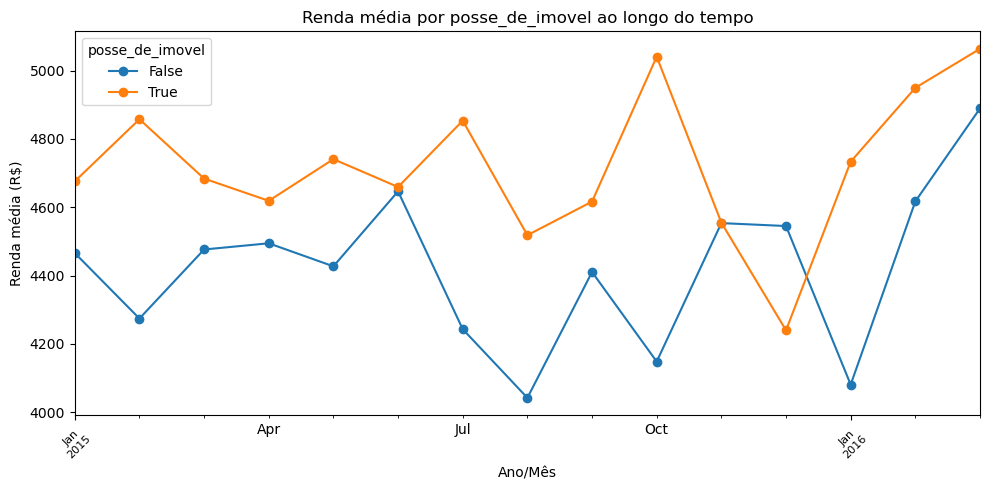

In [20]:
for col in variaveis_bivariadas:
    plt.figure(figsize=(10,5))
    
    # Calcula a renda média por categoria e mês
    media_renda = previsao_de_renda.groupby(["ano_mes", col])["renda"].mean().unstack()
    
    # Gráfico de linha
    media_renda.plot(kind="line", marker="o", figsize=(10,5))
    plt.title(f"Renda média por {col} ao longo do tempo")
    plt.xlabel("Ano/Mês")
    plt.ylabel("Renda média (R$)")
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title=col, loc="best")
    plt.tight_layout()
    plt.show()

Com base nos três gráficos apresentados — sexo, posse de veículo e posse de imóvel —, observa-se que todas as variáveis apresentam comportamento relativamente estável ao longo do tempo, sem oscilações bruscas que indiquem mudanças estruturais nos dados. Em todos os períodos analisados, a renda média dos homens é consistentemente superior à das mulheres, o que sugere uma diferença sistemática de renda por gênero. Da mesma forma, indivíduos com posse de veículo e posse de imóvel tendem a ter renda média mais alta do que aqueles que não possuem esses bens, mantendo essa diferença de forma constante ao longo do tempo.

No caso específico da posse de imóvel, observa-se alguma oscilação nas rendas médias, com picos e quedas em certos períodos (especialmente no final de 2015 e início de 2016). No entanto, a tendência geral permanece estável, e a diferença entre quem possui e quem não possui imóvel continua evidente. Assim, conclui-se que essas variáveis demonstram boa estabilidade temporal e capacidade de discriminar a renda, sendo apropriadas para inclusão em um modelo preditivo.